# Práctica 2 con Python: Clusters
## Objetivo de la práctica: 
Hacer uso de distintos algoritmos de clusters para generar clusters, verificar la calidad de los clusters con distintas K y determinar la mejor opción.
## Objetivos particulares
* Para esta práctica, el objetivo es ver cómo los algoritmos de clustering nos proponen diversas formas de agrupar los datos, así como evaluar cada posible grupo de clusters para seleccionar el más adecuado.


## Dataset a utilizar: 
Iris. Disponible en [Kaggle][irisD]
## El problema a resolver:
El dataset tiene información sobre la variación de las flores Iris de 3-especies(setosa,vrgínica y versicolor). Cada tupla contiene información de la longitud y ancho de los sépalos y pétalos(centímetros).
## Ejemplo de imagen:
![Imagen de ejemplo Iris](iris.jpg)



[irisD]:https://www.kaggle.com/arshid/iris-flower-dataset

## Desarrollo de la práctica:
### 0.- Importación de librerías
* Pandas: Manejar los datos
* Matplotlib: Visualizar los datos(antes y después de aplicar clusters)
* Scikit-learn: Algoritmos de minería de datos

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib. pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
print("Librerias listas")

Librerias listas


C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### 1.- Cargamos los datos de nuestro CSV

In [2]:
datasetIris=pd.read_csv("Iris.csv")
datasetIris.set_index("Id", inplace=True)
datasetIris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### 2.- Exploramos los datos
#### 2.1.- Vista rápida de los datos

In [3]:
datasetIris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### 2.2.- ¿Hay nulos?

In [4]:
datasetIris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### 2.3.- Correlaciones

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDF7F98>,
      dtype=object)

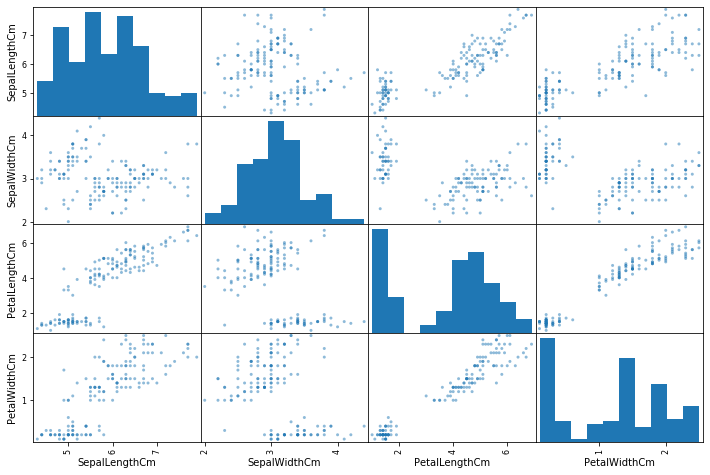

In [5]:
attributes=[]
for i in datasetIris.columns:
    attributes.append(i)
scatter_matrix(datasetIris[attributes],figsize=(12,8))

### 4.- Minería de datos(Clustering)* 
#### 4.1.-Graficamos los datos de los elementos que consideraremos para generar clusters

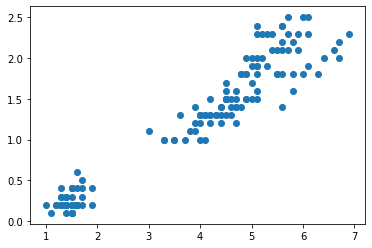

In [6]:
plt.scatter(datasetIris["PetalLengthCm"],datasetIris["PetalWidthCm"])

#### 4.2.- Guardamos los datos en un array de numpy para el procesamiento.

In [7]:
X=np.array(datasetIris[["PetalLengthCm","PetalWidthCm"]])
predictions=pd.DataFrame()

In [8]:
def graficarCentroides(centros):
    x1=[]
    y1=[]
    for x,y in centros:
        x1.append(x)
        y1.append(y)
    plt.scatter(x1,y1,marker="X",c="w",edgecolors="k")

#### 4.2.- [K-Menas][kmeansDoc]


[kmeansDoc]:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

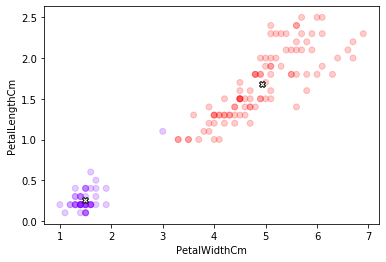

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0)
predictions["KMEANSprediction"]=kmeans.fit_predict(X)
plt.scatter(datasetIris["PetalLengthCm"],
            datasetIris["PetalWidthCm"],
            c=predictions["KMEANSprediction"],
            cmap="rainbow",
           alpha=0.2)
graficarCentroides(kmeans.cluster_centers_)
plt.ylabel("PetalLengthCm")
plt.xlabel("PetalWidthCm")
plt.show()

#### 4.3.- [Aglomerative][aglomerativeDoc]


[aglomerativeDoc]:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

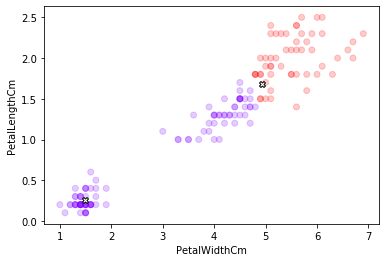

In [10]:
aglomerative = AgglomerativeClustering(linkage='complete', n_clusters=2)#“ward”, “complete”, “average”, “single”
predictions["AGLOMprediction"]=aglomerative.fit_predict(X)

plt.scatter(datasetIris["PetalLengthCm"],
            datasetIris["PetalWidthCm"],
            c=predictions["AGLOMprediction"],
            cmap="rainbow",
           alpha=0.2)
graficarCentroides(kmeans.cluster_centers_)
plt.ylabel("PetalLengthCm")
plt.xlabel("PetalWidthCm")
plt.show()

### 5.- Validación del modelo
#### 5.1.- [Coeficiente de la silueta][Silhouette Coefficient]
[Silhouette Coefficient]:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

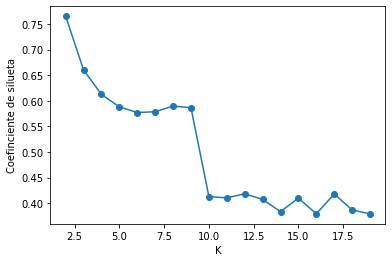

In [11]:
metricEv=[]
ks=range(2,20)
for i in ks:
    kmeanEv = KMeans(n_clusters=i, random_state=0).fit(X)
    labels = kmeanEv.labels_
    metricEv.append(metrics.silhouette_score(X, labels, metric='euclidean'))
plt.plot(ks,metricEv,"o-")
plt.ylabel("Coefinciente de silueta")
plt.xlabel("K")
plt.show()

#### 5.2.- Comprobando con las clases ya definidas

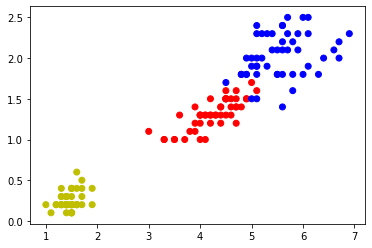

In [12]:
color={
    "Iris-setosa":"y",
    "Iris-versicolor":"r",
    "Iris-virginica":"b"
}
datasetIris["color"]=datasetIris["Species"].map(color)

plt.scatter(datasetIris["PetalLengthCm"],datasetIris["PetalWidthCm"], color=datasetIris["color"])


### 6.- Entrenamiento supervisado
#### 6.1.- Separación de datos
Para poder validar si algún algoritmo de aprendizaje tiene buenos resultados debemos partir nuestros datos en 2 subconjuntos. Al primer subconjunto se le llama "conjunto de entrenamiento" y al segundo "conjunto de prueba".

* Como su nombre lo dice, el conjunto de entrenamiento es con el que le enseñaremos al "algoritmo" a realizar las preicciones. Este conjunto es un 75% a 80% del tamaño del original
* El conjunto de prueba es con el que verificaremos qué tanto acierta en modelo después de haber sido entrenado. ESste conjunto NO debe haber sido utilizado para entrenar NUNCA. De lo contrario, la veracidad de la prueba se verá compropmetida. Este conjunto es de un 20% a 25%

Podemos hacer la separación de los datos de forma manual pero hay que considerar que los datos deben estar balanceados. Para evitar estas complicaciones, scikit learn nos proporciona un método que se encarga de particionar los datos.

In [13]:
X_values=datasetIris.iloc[:,2:4]
Y_values=datasetIris["Species"]
x_train, x_test,y_train,y_test= train_test_split(X_values,Y_values,test_size=0.2, random_state=0)
x_train.head()

,PetalLengthCm,PetalWidthCm
Id,,
138,5.5,1.8
85,4.5,1.5
28,1.5,0.2
128,4.9,1.8
133,5.6,2.2


In [14]:
y_train.head()

Id
138     Iris-virginica
85     Iris-versicolor
28         Iris-setosa
128     Iris-virginica
133     Iris-virginica
Name: Species, dtype: object

In [15]:
modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(x_train, y_train)
print(modelo.score(x_train, y_train))
print(modelo.score(x_test, y_test))

0.9916666666666667
0.9666666666666667


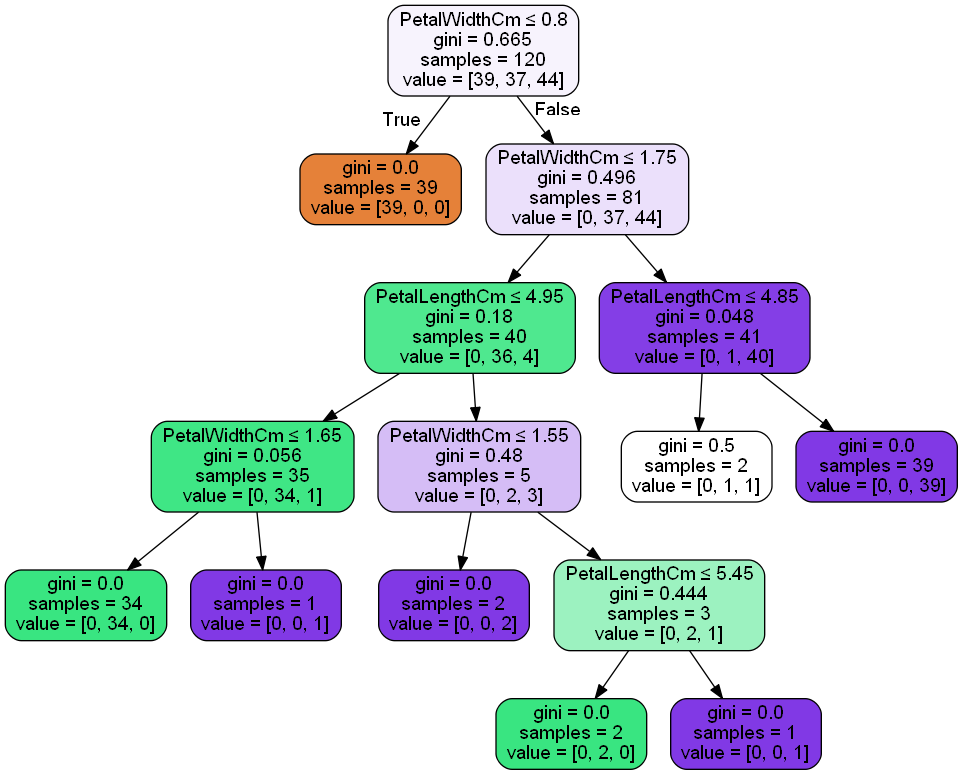

In [16]:
dot_data = StringIO()
nombre_mod="iris.dot"
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = x_train.columns
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())